<a href="https://colab.research.google.com/github/Akramkhan01/Email-Campaign-Effectiveness-Prediction-Capstone-Project/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Email Campaign Effectiveness Prediction**

# **Problem Statement**

Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

In [ ]:
#Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Path of data in drive
data_path='/content/drive/MyDrive/Email Campaign Effectiveness Prediction - Akram Khan/data_email_campaign.csv'
#Reading csv file
email_data=pd.read_csv(data_path)

In [ ]:
#Print top  rows 
email_data.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
#Print bottom  rows 
email_data.tail()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0
68352,EMA00089999316900,1,1.5,1,G,2,20.0,2,1038,6.0,0.0,0


# **Data Description**

The data has the following features:
* Email_ID — This column contains the email ids of individuals.
* Email_type — Email type contains 2 categories 1 and 2. We can assume that the types are like promotional email or important email.
* Subject_Hotness_Score — It is the email effectiveness score.
* Email_Source — It represents the source of the email like sales or marketing or product type email.
* Email_Campaign_Type — Campaign type
* Total_Past_Communications — This column contains the previous mails from the same source.
* Customer_Location — Categorical data which explains the different demographics of the customers.
* Time_Email_sent_Category — It has 3 categories 1,2 and 3 which may give us morning,evening and night time slots.
* Word_Count — It contains the no.of words contained in the mail.
* Total_Links — Total links from the mail.
* Total_Images — The banner images from the promotional email.
* Email_Status — It is the target variable which contains the characterization of the mail that is ignored; read; acknowledged by the reader.




# **Exploratory Data Analysis**

In [ ]:
#Retreiving Column names
email_data.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
#Number of rows and columns
email_data.shape

(68353, 12)

In [ ]:
# Check for duplicates

duplicate_df = email_data[email_data.duplicated()]
duplicate_df

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status


# **We dont have any duplicate records**

In [ ]:
#Description of dataset 
email_data.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


In [ ]:
#Type of features
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


# **Handling Missing Data**

In [ ]:
#missing values in our dataset
missing = pd.DataFrame([email_data.isnull().sum(),email_data.isnull().sum()*100.0/email_data.shape[0]]).T
missing.columns = ['No. of Missing Data', '% Missing Data']
missing


,No. of Missing Data,% Missing Data
Email_ID,0.0,0.000000
Email_Type,0.0,0.000000
Subject_Hotness_Score,0.0,0.000000
Email_Source_Type,0.0,0.000000
Customer_Location,11595.0,16.963411
Email_Campaign_Type,0.0,0.000000
Total_Past_Communications,6825.0,9.984931
Time_Email_sent_Category,0.0,0.000000
Word_Count,0.0,0.000000
Total_Links,2201.0,3.220049


From the above data we realise that 4 features have null values. Will be handling it in the upcoming Data Cleaning section.

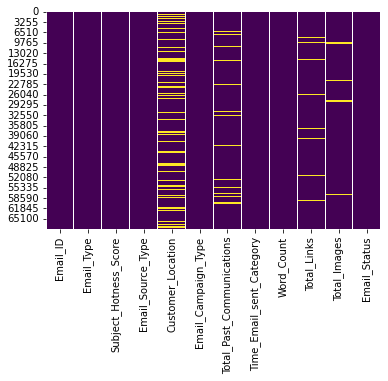

In [ ]:
# Visualizing the missing values
sns.heatmap(email_data.isnull(),cbar=False,cmap='viridis')

In [ ]:
email_data.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


# **Analysis of Categorical data**

In [ ]:
#creating new dataframe of only categorical columns
ds_cat = email_data.select_dtypes(include =['object','int']).copy()
#dropping Word_Count because it's numeric data
ds_cat.drop('Word_Count',axis=1,inplace=True)
ds_cat.head(2)

,Email_ID,Email_Type,Email_Source_Type,Customer_Location,Email_Campaign_Type,Time_Email_sent_Category,Email_Status
0,EMA00081000034500,1,2,E,2,1,0
1,EMA00081000045360,2,1,NaN,2,2,0


In [ ]:
ds_cat_stats = pd.DataFrame(columns = ['Column', 'Values', 'Total Count', 'Total_COunt_Excluding_Null', 
                                       'Missing Value', 'Missing %'])
tmp = pd.DataFrame()

for c in ds_cat.columns:
    tmp['Column'] = [c]
    tmp['Values'] = [ds_cat[c].unique()]
    tmp['Total Count'] = len(list(ds_cat[c].unique()))
    tmp['Total_COunt_Excluding_Null'] = int(ds_cat[c].nunique())
    tmp['Missing Value'] = ds_cat[c].isnull().sum()
    tmp['Missing %'] = (ds_cat[c].isnull().sum()/ len(ds_cat)).round(3)*100
    ds_cat_stats = ds_cat_stats.append(tmp)
    
ds_cat_stats

,Column,Values,Total Count,Total_COunt_Excluding_Null,Missing Value,Missing %
0,Email_ID,"[EMA00081000034500, EMA00081000045360, EMA0008...",68353,68353,0,0.0
0,Email_Type,"[1, 2]",2,2,0,0.0
0,Email_Source_Type,"[2, 1]",2,2,0,0.0
0,Customer_Location,"[E, nan, B, C, G, D, F, A]",8,7,11595,17.0
0,Email_Campaign_Type,"[2, 3, 1]",3,3,0,0.0
0,Time_Email_sent_Category,"[1, 2, 3]",3,3,0,0.0
0,Email_Status,"[0, 1, 2]",3,3,0,0.0


* As we can see we have 17% missing values in Customer Location.
* There is no missing values in any other categorical variable.
* Email_Type and Email_Source_Type have 2 categories.
* Email_Campaign_Type,Time_Email_sent_Category and Email_Status have 3 Categories
* Look at the Variable 'Customer_Location' -- distinct categories are 8 but without nans it is 7.

**Since we are working on a Multi-Class Classification problem we should also look at the relationship between the dependent variable and independent variable.**

In [ ]:
# Dropping Email_ID column
ds_cat.drop('Email_ID',axis=1,inplace=True)

In [ ]:
def barPerc(df,xVar,ax):
    ''' barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])
    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 7 X categories, 3 hues =>
        ##    [0, 8, 16] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])
        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

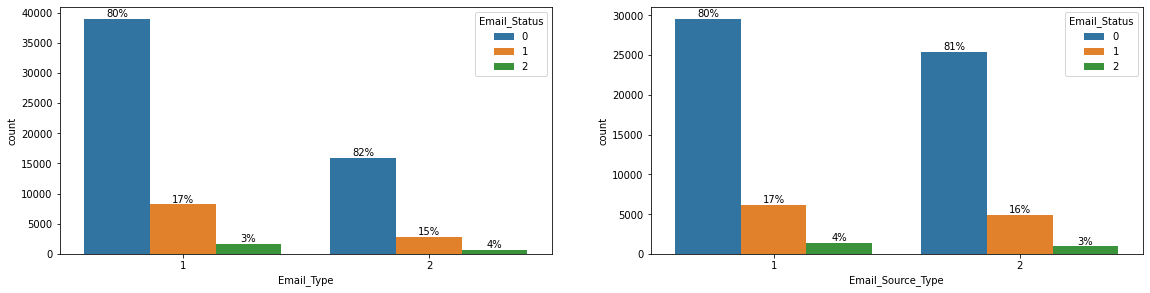

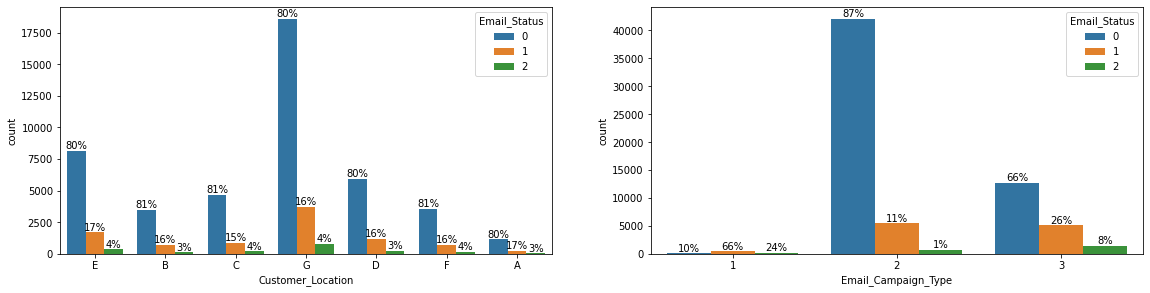

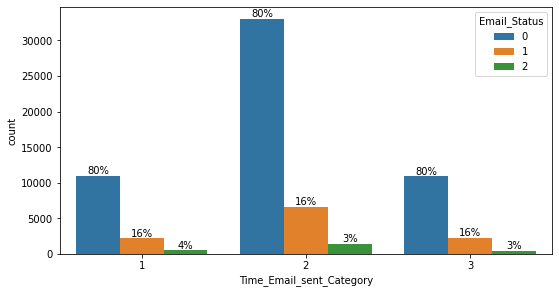

<Figure size 2160x720 with 0 Axes>

In [ ]:
ix = 1
fig = plt.figure(figsize = (30,10))
for c in list(ds_cat.columns):
    if ix < 3:
        if c != 'Email_Status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = ds_cat, x=c,hue='Email_Status' ,ax = ax1)
            barPerc(ds_cat,c,ax1)            
    ix = ix +1
    if ix == 3: 
        fig = plt.figure(figsize = (30,10))
        ix =1

As we can observe the distribution of Email_Status is almost similar in all the categories except in Email_Campaign_Type we can see that it shows a totally different trend . For Email_Campaign_Type=1 we see that only 10% of customers are ignoring the email and for 2 around 87% customer ignore the emails.

# **Analysis of Numerical Data**

In [ ]:
#creating new dataframe of only numerical columns
ds_num = email_data.select_dtypes(include =['float']).copy()
ds_num['Word_Count'] = email_data.loc[ds_num.index, 'Word_Count'].copy()
ds_num.head(2)

,Subject_Hotness_Score,Total_Past_Communications,Total_Links,Total_Images,Word_Count
0,2.2,33.0,8.0,0.0,440
1,2.1,15.0,5.0,0.0,504


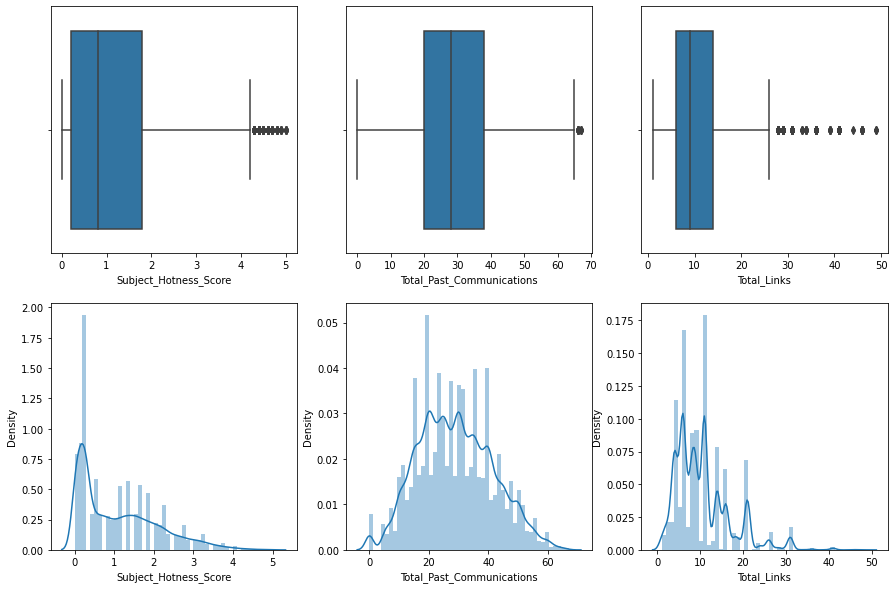

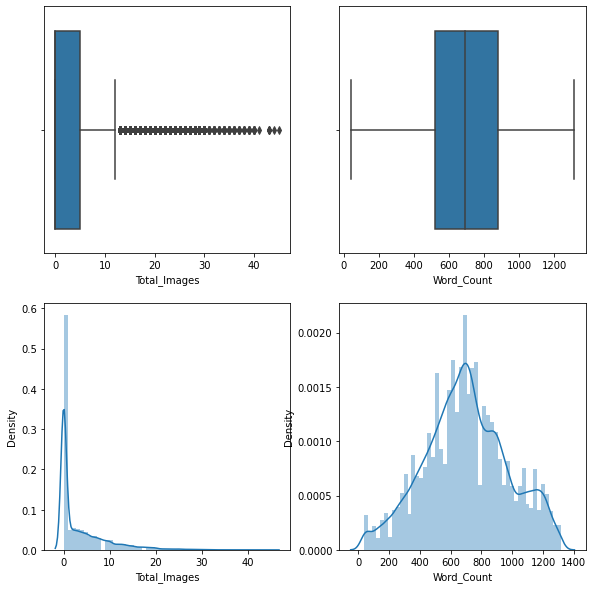

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(ds_num.columns):
    if ix <= 3:
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data = ds_num, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.distplot(ds_num[c], ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

There are **outliers** in **Subject_Hotness_Score**,**Total_Links** and **Total_Images** and the distribution of these features are **right skewed** in nature. There are also a few outliers in Total_Past_Communication which has a normal distribution .

### **Lets look at the relationship between the dependent variable and independent variable. In order to do that let's add our dependent variable to this dataset.**

In [ ]:
ds_num['Email_Status'] = email_data.loc[ds_num.index, 'Email_Status'].copy()

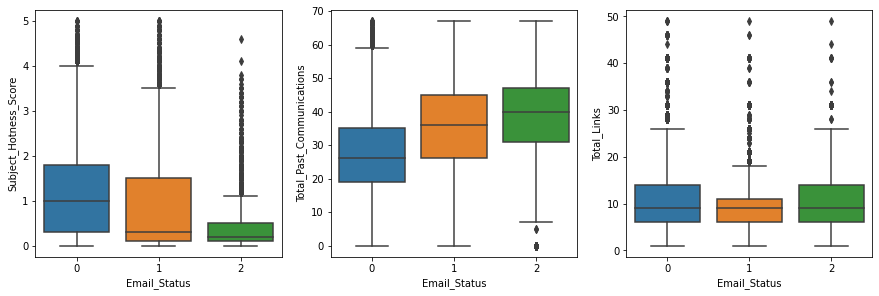

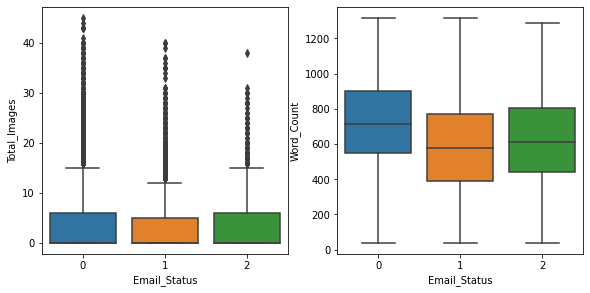

<Figure size 1080x720 with 0 Axes>

In [ ]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(ds_num.columns):
    if ix <= 3:
        if c != 'Email_Status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data=ds_num, x='Email_Status', y=c, ax=ax1)        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

* Subject_Hotness_Score -> All Email_Status i.e 0,1,2 have outliers. 0 have highest median and 1,2 are right skewed. It is observed that the Subject_Hotness_Score for read/acknowledged mails are much lower.
* Total_Past_Communications -> 0,2 have outliers and 2 have highest median .
* Total_Links ->0,1,2 all have outliers,All have the same median but 0,2 have higher variance compare to 1.
* Total_Images ->0,1,2 all have outliers and All have the same median. Hence all the mails have the same range of images.
* Word_Count ->Median of 0 is highest. Thus we can understand that ignored mails have higher word count.


## **Lets see the correlation of numerical**

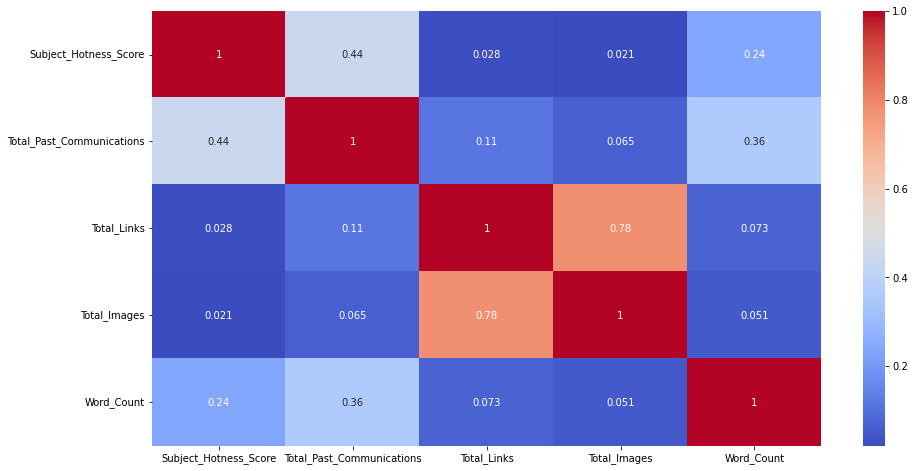

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = ds_num.drop('Email_Status',axis=1).corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

We can observe that there is a relationship between Total_Images and Total_Links, they have 78% positive correlation. To understand if this relation holds true, we try and validate with a lmplot b/w the two features.

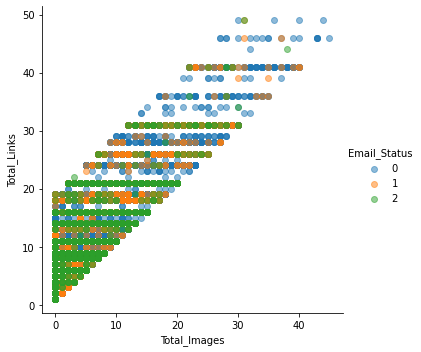

In [ ]:
sns.lmplot(x='Total_Images', y='Total_Links', hue='Email_Status', data=email_data, fit_reg=False, scatter_kws={'alpha':0.5})

We can conclude from the above information that there is a high positive correlation between these two features. Lets now understand each feature individually.

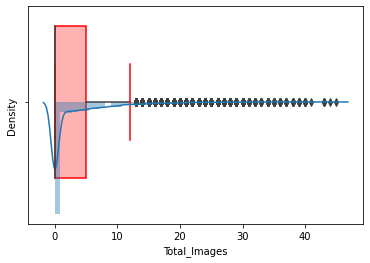

In [ ]:
ax=sns.boxplot(ds_num['Total_Images'],capprops=dict(color="red"),boxprops=dict(facecolor="red", color="red"))
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.distplot(ds_num['Total_Images'])

More than 50% of values are 0 and there are there is a presence of outliers in Total_Images

In [ ]:
#Finding number of data having 0 images
img_cnt_0=ds_num[ds_num['Total_Images']==0].count()['Total_Images']
#Total number of non nan data
total=ds_num['Total_Images'].count()
#finding percentage
pcnt_img_0=(img_cnt_0/total)*100
print("Percentage of data having Total_Images Zero is = ",pcnt_img_0)

Percentage of data having Total_Images Zero is =  52.58263843061971


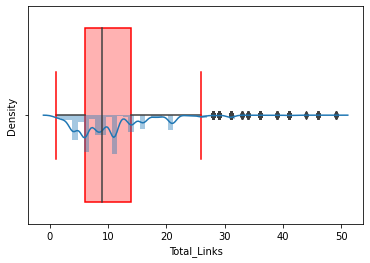

In [ ]:
ax=sns.boxplot(ds_num['Total_Links'],capprops=dict(color="red"),boxprops=dict(facecolor="red", color="red"))
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
sns.distplot(ds_num['Total_Links'])

Compared to Total_Images, Total_Links has very few outliers. 
 
 Since images and links are correlated and most of the values in Total_Images is 0 we will combine both the features.
 
 Before that we need to see if there is any null values in this column .

In [ ]:
# Number of NaNs for each object
email_data.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

Since there are null values we need to impute them individually after that we can combine Total_Links and Total_Images

# **Null Value Imputation**

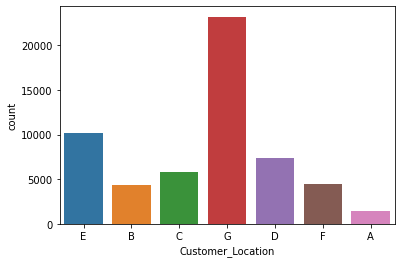

In [ ]:
#Visualizing Customer_Location
sns.countplot(email_data['Customer_Location'])

Text(0.5, 1.0, 'Customer Locations bar plot after imputing nulls')

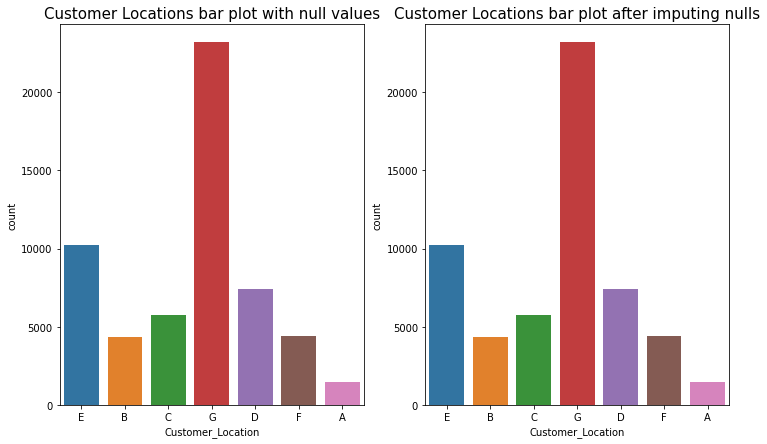

In [ ]:
plt.figure(figsize=(12,7))

# Plotting Customer Locations with null values
plt.subplot(1,2,1)
sns.countplot(email_data['Customer_Location'])
plt.title('Customer Locations bar plot with null values', fontsize=15)

# Plotting bar plot for Customer_Location
plt.subplot(1,2,2)
sns.countplot(email_data['Customer_Location'])
plt.title('Customer Locations bar plot after imputing nulls', fontsize=15)

Area G has most number of customers and area A has least number of customers. Also the bars from before and after missing value imputation are in conjunction which implies the method of predicting missing values has worked quite well.

Text(0.5, 1.0, 'Email Source Types bar plot')

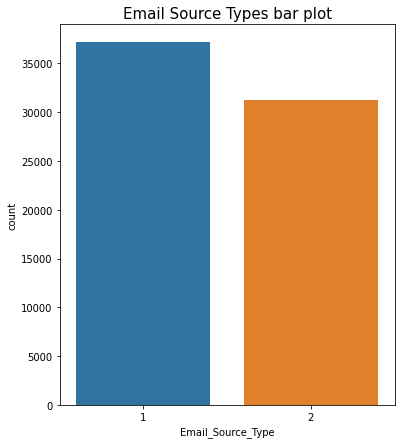

In [ ]:
# Plotting bar plot for Email_Source_Type
plt.figure(figsize=(6,7))
sns.countplot(email_data['Email_Source_Type'])
plt.title('Email Source Types bar plot', fontsize=15)

Emails were sent from both the sources with almost equal probability.

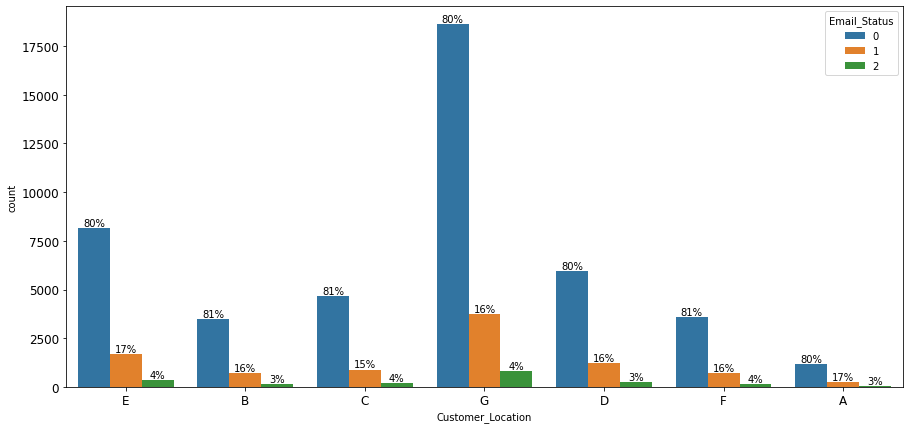

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.countplot(email_data['Customer_Location'],hue=email_data['Email_Status'])
plt.xticks(size=12)
plt.yticks(size=12)
barPerc(email_data,'Customer_Location',ax)

As we can see irrespective of location the ratio of Email_Status is same throughout .So we can drop the location column

In [ ]:

print('Shape of data before dropping ',email_data.shape)
#dropping Customer_Location column
email_data.drop('Customer_Location',inplace=True,axis=1)
print('Shape of data after dropping ',email_data.shape)


Shape of data before dropping  (68353, 12)
Shape of data after dropping  (68353, 11)


Lets find out which metrics we should use to fill missing values of Total_Past_Communications column

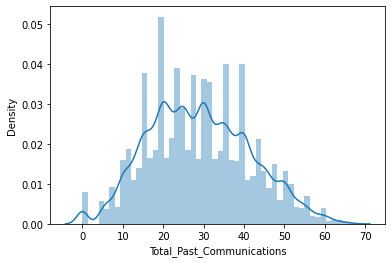

In [ ]:
sns.distplot(email_data.Total_Past_Communications)

As we can observe the data is symmetricaly distributed so we can use mean value for imputing missing values

In [ ]:
print('Number of missing values before imputing is = ',email_data['Total_Past_Communications'].isnull().sum())
email_data['Total_Past_Communications'].fillna(email_data['Total_Past_Communications'].mean(),inplace=True)
print('Number of missing values after imputing is = ',email_data['Total_Past_Communications'].isnull().sum())

Number of missing values before imputing is =  6825
Number of missing values after imputing is =  0


Now lets find out which metrics we should use to fill missing values of Total_Links column

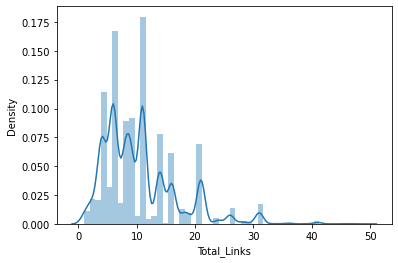

In [ ]:
sns.distplot(email_data.Total_Links)

Since the data is not normally distributed we will use Mode to impute missing value

In [ ]:
#Filling missing values of Total_Links column
print('Number of missing values before imputing is = ',email_data['Total_Links'].isnull().sum())
email_data['Total_Links'].fillna(email_data['Total_Links'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',email_data['Total_Links'].isnull().sum())

Number of missing values before imputing is =  2201
Number of missing values after imputing is =  0


Now lets find out which metrics we should use to fill missing values of Total_Images column

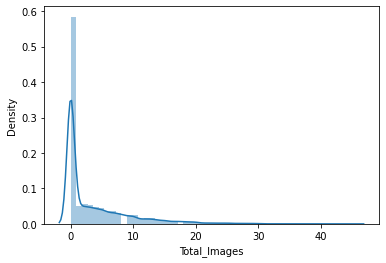

In [ ]:
sns.distplot(email_data.Total_Images)

Since the data is not normally distributed we will use Mode to impute missing value

In [ ]:
#Filling missing values of Total_Links column
print('Number of missing values before imputing is = ',email_data['Total_Images'].isnull().sum())
email_data['Total_Images'].fillna(email_data['Total_Images'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',email_data['Total_Images'].isnull().sum())

Number of missing values before imputing is =  1677
Number of missing values after imputing is =  0


In [ ]:
email_data.isnull().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

**Now we have no missing values, So we can combine Links and Images column into one.**

In [ ]:
email_data['Links_Images']=email_data['Total_Links']+email_data['Total_Images']

In [ ]:
#Dropping Total_Images and Total_Links  column
print('Shape of data before dropping ',email_data.shape)
email_data.drop(['Total_Images','Total_Links'],inplace=True,axis=1)
print('Shape of data after dropping ',email_data.shape)

Shape of data before dropping  (68353, 12)
Shape of data after dropping  (68353, 10)


Text(0.5, 1.0, 'Pie Chart showing Email Status')

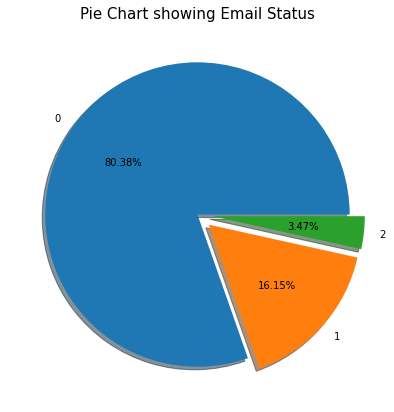

In [ ]:
# Plotting a pie chart for Email_Status
plt.figure(figsize = (10,7))
plt.pie(email_data['Email_Status'].value_counts(), labels = [0,1,2], explode = [0,0.1,0.1], autopct='%1.2f%%', shadow = True)
plt.title('Pie Chart showing Email Status', fontsize = 15)

Around 3.47% of the emails are actually hitting targets that is those customers are reading and acknowledging the mails. Around 16.15% of customers are reading the mails who might be potential customers given some offers or something else.

Text(0.5, 1.0, 'Email Types bar plot')

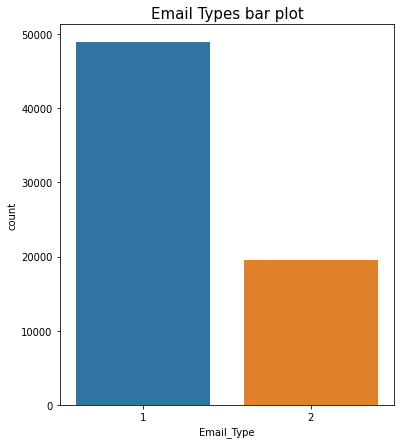

In [ ]:
# Plotting bar plot for Email_Type
plt.figure(figsize=(6,7))
sns.countplot(email_data['Email_Type'])
plt.title('Email Types bar plot', fontsize=15)

# **Feature Engineering**

In [ ]:
# import the seaborn library
import seaborn as sns
 
 
# change the estimator from mean to
# standard deviation
sns.barplot(x ='Customer_Location', y ='Email_Type', data = email_data, 
            palette ='plasma')

ValueError: ignored

In [ ]:
# import the seaborn library
import seaborn as sns
 
 
# change the estimator from mean to
# standard deviation
sns.barplot(x ='Customer_Location', y ='Email_Source_Type', data = email_data, 
            palette ='plasma')

In [ ]:
# import the seaborn library
import seaborn as sns
 
 
# change the estimator from mean to
# standard deviation
sns.barplot(x ='Customer_Location', y ='Email_Status', data = email_data, 
            palette ='plasma')

In [ ]:
# import the seaborn library
import seaborn as sns
 
 
# change the estimator from mean to
# standard deviation
sns.barplot(x ='Customer_Location', y ='Email_Status', data = email_data, 
            palette ='plasma')

In [ ]:
sns.countplot(x ='Total_Images', data = email_data)

In [ ]:
#Visualizing Customer_Location
sns.countplot(email_data['Customer_Location'])

In [ ]:
email_data['Email_Status'].value_counts()